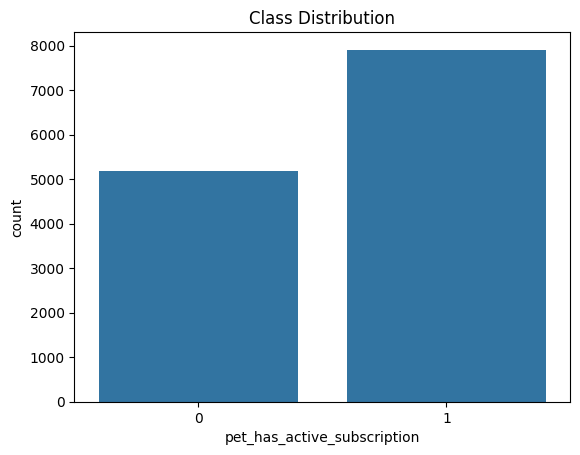

Class distribution: Counter({1: 7909, 0: 5178})


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

# Load dataset
df_class = pd.read_csv("final_pet_food_dataset.csv")

# Class balance check
sns.countplot(x="pet_has_active_subscription", data=df_class)
plt.title("Class Distribution")
plt.show()

print("Class distribution:", Counter(df_class['pet_has_active_subscription']))


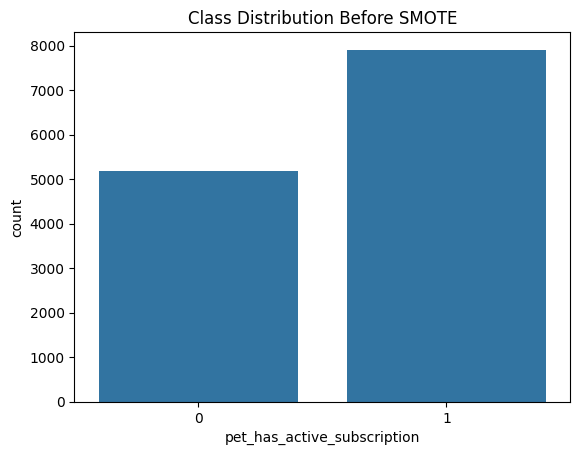

Original class counts: Counter({1: 7909, 0: 5178})


c:\python\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


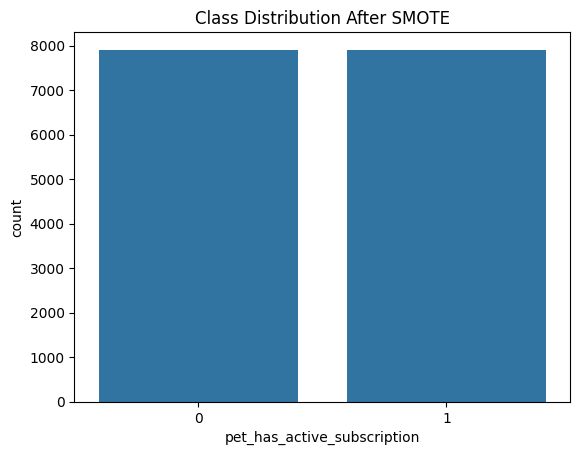

Resampled class counts: Counter({0: 7909, 1: 7909})
Cleaned dataset shape: (15659, 16)
Class distribution after outlier removal: Counter({0: 7870, 1: 7789})


C:\Users\Dell XPS 15\AppData\Local\Temp\ipykernel_33496\3461028708.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean["pet_has_active_subscription"] = y_clean


In [5]:
df = pd.read_csv("final_pet_food_dataset.csv")
# Prepare features and target
X = df.drop(columns=["pet_has_active_subscription", "pet_id", "customer_id"])
y = df["pet_has_active_subscription"]

# Visualize original class distribution
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.show()

print("Original class counts:", Counter(y))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Visualize class distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

print("Resampled class counts:", Counter(y_resampled))

# Optional: Remove outliers using Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X_resampled)

# Filter inliers only
X_clean = X_resampled[outliers == 1]
y_clean = y_resampled[outliers == 1]

# Final cleaned dataset shape
print("Cleaned dataset shape:", X_clean.shape)
print("Class distribution after outlier removal:", Counter(y_clean))

# Save cleaned data for later use
X_clean["pet_has_active_subscription"] = y_clean
#X_clean.to_csv("classification_dataset_cleaned.csv", index=False)

What This Code Does:

Balances class labels using SMOTE,
Cleans the resampled dataset using Isolation Forest,
Saves the resulting balanced and cleaned dataset for modeling

original data

In [6]:
import pandas as pd
from collections import Counter

# Load original dataset
df_class = pd.read_csv("final_pet_food_dataset.csv")

# Define original features and labels
X_original = df_class.drop(columns=["pet_id", "customer_id", "pet_has_active_subscription"])
y_original = df_class["pet_has_active_subscription"]

# Print original class distribution
print("Original:", Counter(y_original))


Original: Counter({1: 7909, 0: 5178})


data after cleaning

In [7]:
# After SMOTE + Isolation Forest
print("After SMOTE and cleaning:", Counter(y_clean))


After SMOTE and cleaning: Counter({0: 7870, 1: 7789})


compairing

In [8]:
print("Original class distribution:", Counter(y_original))
print("After SMOTE and Isolation Forest:", Counter(y_clean))


Original class distribution: Counter({1: 7909, 0: 5178})
After SMOTE and Isolation Forest: Counter({0: 7870, 1: 7789})


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from collections import Counter

df = pd.read_csv("final_pet_food_dataset.csv")

# Prepare features and target
X = df.drop(columns=["pet_id", "customer_id", "pet_has_active_subscription"])
y = df["pet_has_active_subscription"]

# Apply TomekLinks to remove overlap
tl = TomekLinks()
X_tomek, y_tomek = tl.fit_resample(X, y)

# Compare class distributions
print("Before TomekLinks:", Counter(y))
print("After TomekLinks:", Counter(y_tomek))


Before TomekLinks: Counter({1: 7909, 0: 5178})
After TomekLinks: Counter({1: 6094, 0: 5178})


c:\python\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


To reduce class overlap and improve decision boundaries, we applied TomekLinks to the classification dataset. This method identified and removed overlapping instances between classes, reducing noise near class borders. The class distribution became slightly more balanced, and the cleaned dataset is now better suited for robust classification modeling.